# ベータ分布について
MAP推定の事前分布においてベータ分布という単語が見られた。   
これはa,bの値によって変化し、この変化について少し見ていこうと思う。   
(以下ではデータはベルヌーイに従うものとする。)
$$ Beta(\theta|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1} $$
ここで$ \Gamma(x) = \int_0^\infty u^{x-1}e^{-u}du $というガンマ関数である。

In [1]:
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import bernoulli
from scipy import stats
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

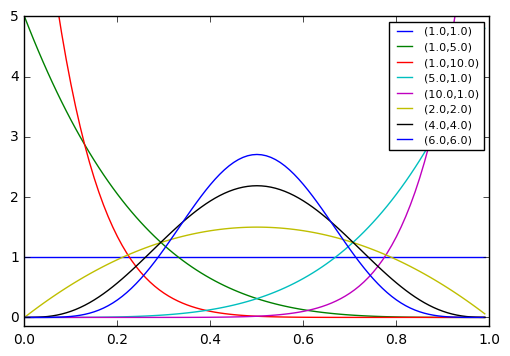

In [7]:
A = [1.,1.,1.,5.,10.,2.,4.,6.]
B = [1.,5.,10.,1.,1.,2.,4.,6.]
x = np.arange(0,1,0.01)
for (a,b) in zip(A,B):
    C = integrate.quad(lambda u: (u**(a+b-1)) * (np.exp(-u)), 0, np.inf)[0]
    C = C/(integrate.quad(lambda u: (u**(a-1)) * (np.exp(-u)), 0, np.inf)[0])
    C = C/(integrate.quad(lambda u: (u**(b-1)) * (np.exp(-u)), 0, np.inf)[0])
    y = C*(x**(a-1))*((1-x)**(b-1))
    plt.plot(x,y,label="({},{})".format(a,b))
    plt.ylim([-0.15, 5.0])
    plt.legend(fontsize=8)

上のグラフはベータ分布のa,bの幾つかの組みに対してグラフをプロットさせてそれぞれの比較を行った。

# ベルヌーイ分布におけるMAP推定について

まずはじめにベルヌーイ分布に従うデータを20点作成する。

In [108]:
X = bernoulli.rvs(0.5, size=20);X

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [111]:
omote = 0
ura = 0
for i in xrange(20):
    if X[i] == 1:
        omote = omote + 1
    ura = 20 - omote

overleafで求めたように最適解は
$$ \theta_{MAP} = \frac{(\sum_{i=!}^{n}x_i)+a-1}{n+a+b-2} $$
であるので

In [124]:
def best_theta(n,size,a,b):
    theta = (n+a-1.0) / (size+a+b-2.0)
    return theta

In [125]:
for (a,b) in zip(A,B):
    print best_theta(omote,20,a,b),"({},{})".format(a,b)

0.55 (1,1)
0.458333333333 (1,5)
0.379310344828 (1,10)
0.625 (5,1)
0.689655172414 (10,1)
0.545454545455 (2,2)
0.538461538462 (4,4)
0.533333333333 (6,6)


# おまけ

In [90]:
#ベルヌーイ分布
print(bernoulli.rvs(0.5, size=10))
#ガンマ分布
#print(gamma(a=1.0, scale=1.0).rvs(10))
#ベータ分布
print(beta(a=1.0, b=1.0).rvs(10))

[0 1 0 1 1 0 1 1 1 1]
[ 0.31340485  0.7095812   0.87649065  0.50937394  0.81490266  0.4374882
  0.02023305  0.8249261   0.21161789  0.48870691]
